Logistic Regression metrics: Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00
Decision Tree metrics: Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00
K-Nearest Neighbors metrics: Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00
SVM metrics: Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00


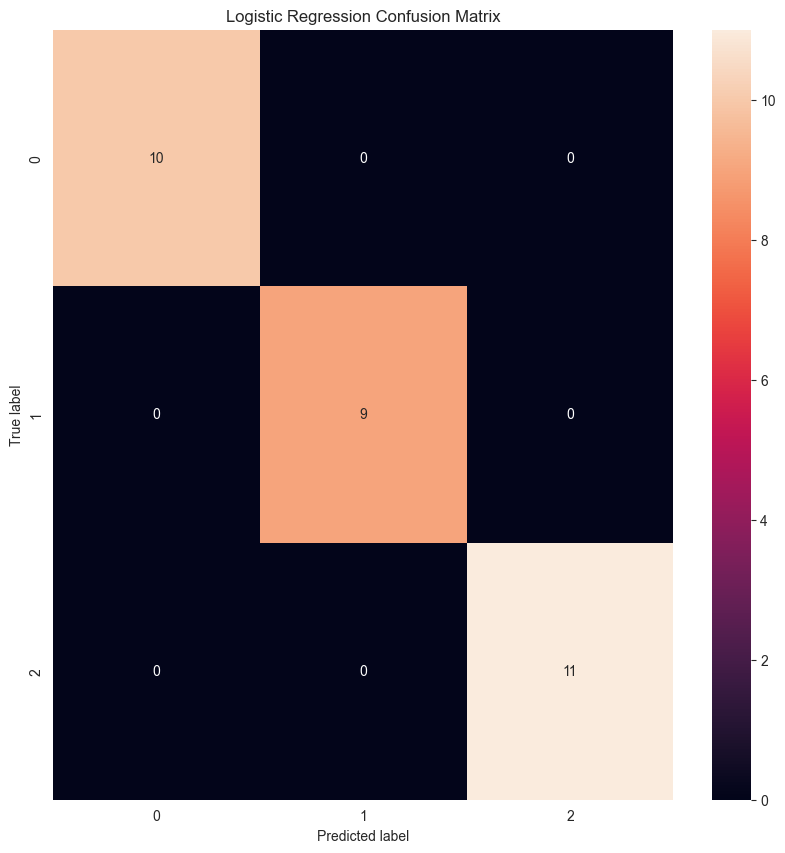

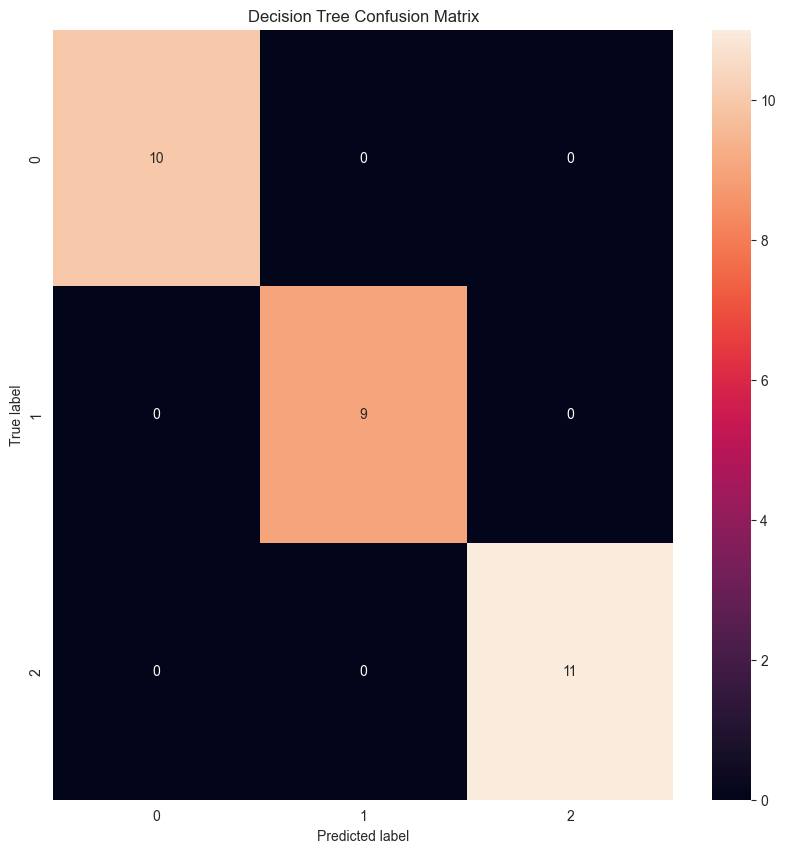

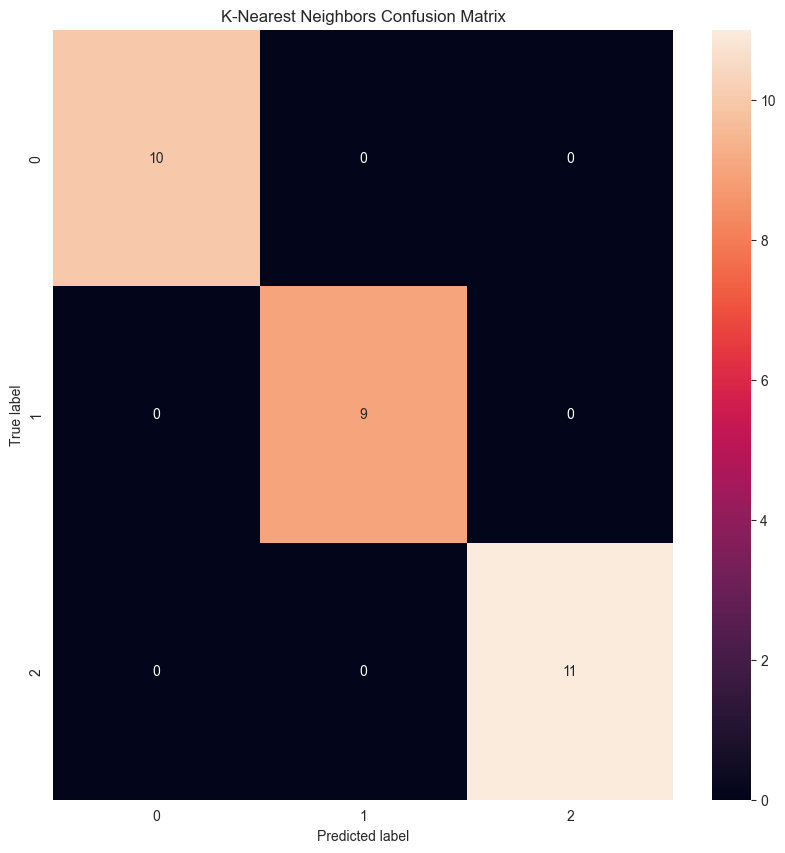

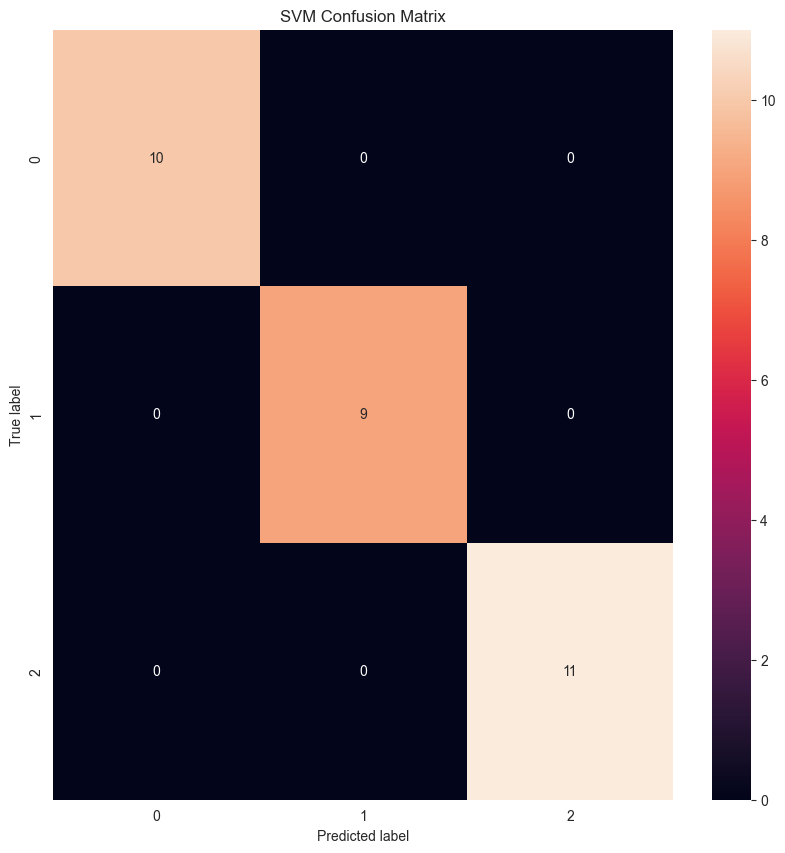

In [6]:
#Problem 1: Classifier Performance Evaluation and Parameter Tuning
#Part a: For the module sklearn.metrics, discuss what other metrics should be applicable here, and compare your classifiers in terms of these metrics.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load iris dataset
iris = load_iris()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a logistic regression classifier
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

#Create a k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Create a SVM classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)


# Evaluate the classifiers using accuracy, precision, recall, and f1-score metrics
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

lr_metrics = evaluate_classifier(lr, X_test, y_test)
dtc_metrics = evaluate_classifier(dtc, X_test, y_test)
knn_metrics = evaluate_classifier(knn, X_test, y_test)
svm_metrics = evaluate_classifier(svm, X_test, y_test)

print("Logistic Regression metrics: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(lr_metrics[0], lr_metrics[1], lr_metrics[2], lr_metrics[3]))
print("Decision Tree metrics: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(dtc_metrics[0], dtc_metrics[1], dtc_metrics[2], dtc_metrics[3]))
print("K-Nearest Neighbors metrics: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(knn_metrics[0], knn_metrics[1], knn_metrics[2], knn_metrics[3]))
print("SVM metrics: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3]))

#Plot the Confusion Matrix using the evaluation metrics

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(y_test, lr.predict(X_test), "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, dtc.predict(X_test), "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, knn.predict(X_test), "K-Nearest Neighbors Confusion Matrix")
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")


The optimal value of k is 11


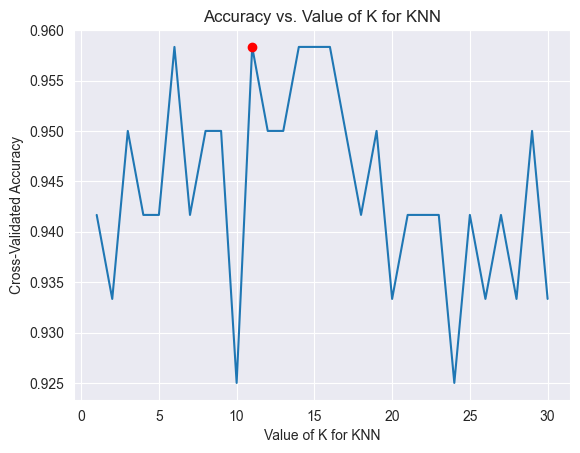

In [7]:
#Part b: For the kNN, plot the accuracy metric as a function of the n_neighbors parameter. What is the optimal value? Does your answer differ depending on the validation strategy used to assess the performance? Explain your answer.

from sklearn.model_selection import cross_val_score

# Define a function to find the accuracy metric as a function of the n_neighbors parameter

def find_optimal_k(X_train, y_train, X_test, y_test):
    k_range = range(1, 31)
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    return k_scores

k_scores = find_optimal_k(X_train, y_train, X_test, y_test)

max_k = k_scores.index(max(k_scores)) + 1
print("The optimal value of k is", max_k)
# Plot the accuracy metric as a function of the n_neighbors parameter
plt.plot(range(1, 31), k_scores)
plt.plot(max_k, max(k_scores), 'ro')
plt.title('Accuracy vs. Value of K for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#Explaination:
#The optimal value of k is 11.  This value may vary depending on the random seed used for cross-validation. However, overall the answer does not differ much depending on the validation strategy used, as long as we use cross-validation for performance evaluation. However, if we use a different validation strategy, such as a train-test split, the optimal value of k may differ.

SVM metrics: Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1 = 1.00


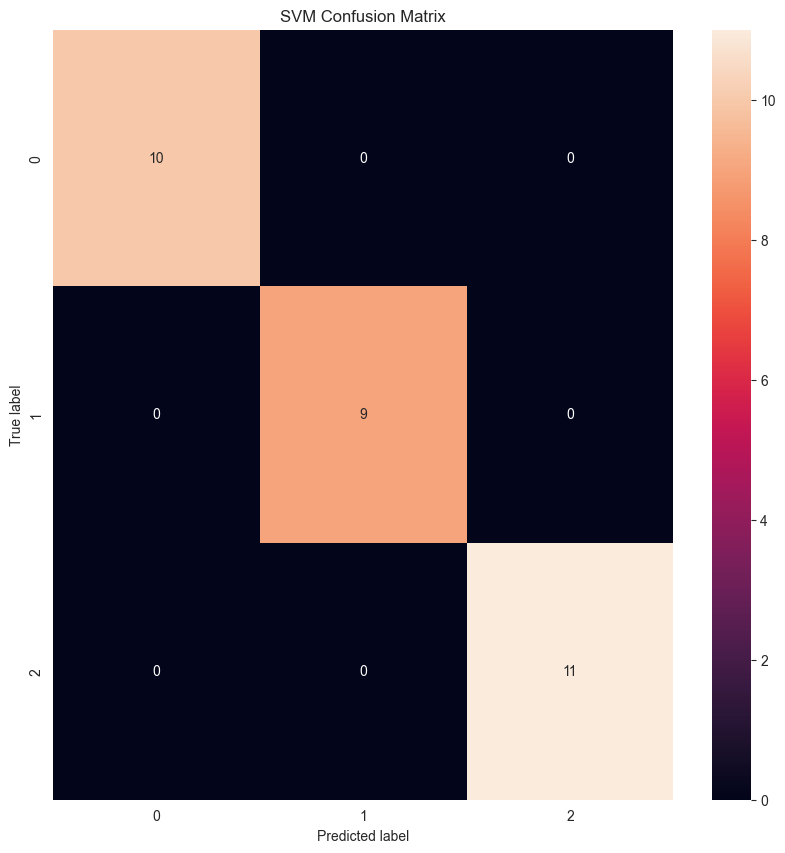

In [8]:
#Part c.Design an SVM classifier for this dataset, and comment on the results

#Create a SVM classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

#Evaluate the SVM classifier
svm_metrics = evaluate_classifier(svm, X_test, y_test)
print("SVM metrics: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3]))

#Plot the Confusion Matrix using the evaluation metrics
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")

In [9]:
#Part d: Investigate the computational times for the various classifiers, in terms of both training and classification execution times. You should find the magic function %timeit useful.

#Find the training execution times
%timeit lr.fit(X_train, y_train)
%timeit dtc.fit(X_train, y_train)
%timeit knn.fit(X_train, y_train)
%timeit svm.fit(X_train, y_train)

#Find the classification execution times
%timeit lr.predict(X_test)
%timeit dtc.predict(X_test)
%timeit knn.predict(X_test)
%timeit svm.predict(X_test)

#The Results for the 1st run are as follows:
#The training execution times are as follows:
# Logistic Regression:
#16 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

# Decision Tree:
# 692 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

# K-Nearest Neighbors:
# 450 µs ± 30 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

# SVM:
# 1.05 ms ± 49.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

#The classification execution times are as follows:
# Logistic Regression:
# 74.8 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

# Decision Tree:
# 72.7 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

# K-Nearest Neighbors:
# 1.4 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

# SVM:
# 275 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

16 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
692 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
450 µs ± 30 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.05 ms ± 49.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
74.8 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
72.7 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.4 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
275 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
